In [1]:
import os, sys
sys.path.append(os.path.join("../.."))

import privugger.transformer.datastructures as pvds
from privugger.transformer.discrete import *
from privugger.transformer.continuous import *
from privugger.transformer.program_output import *

from privugger.transformer.method import *
from privugger.measures.mutual_information import *

import numpy as np
import theano
from matplotlib import pyplot as plt
import arviz as az
import pymc3 as pm

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [27]:
#############
## program ##
#############
# path_to_program = 'location_obfuscation.py'

@theano.compile.ops.as_op(itypes=[tt.lvector], otypes=[tt.lvector])
def obfuscate(locations):
    return np.array([loc+np.random.randint(10) for loc in locations])

In [28]:
###########
## prior ##
###########

with pm.Model() as model:
    locations  = pm.DiscreteUniform("locations", 0, 50, shape=10)
    pm.Deterministic("output",obfuscate(locations))
    
    trace = pm.sample(10000,tune=5000)

<ipython-input-28-d7263e1d144b>:9: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(10000,tune=5000)
Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [locations]


Sampling 4 chains for 5_000 tune and 10_000 draw iterations (20_000 + 40_000 draws total) took 8 seconds.
The number of effective samples is smaller than 10% for some parameters.


In [29]:
trace_infd = az.from_pymc3(trace,model=model)

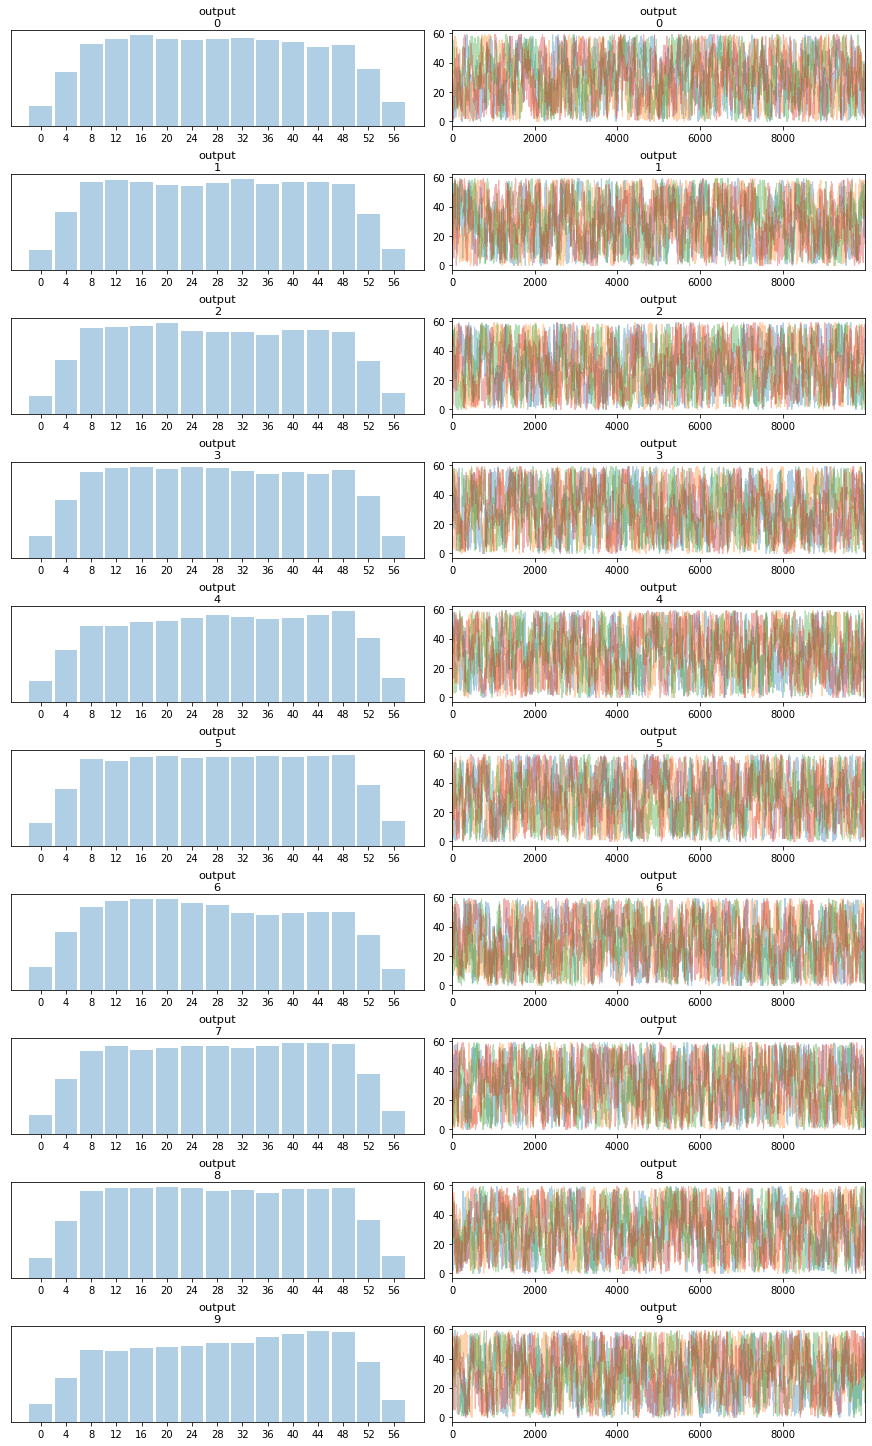

In [30]:
az.plot_trace(trace_infd, var_names=['output'],compact=False,combined=True);

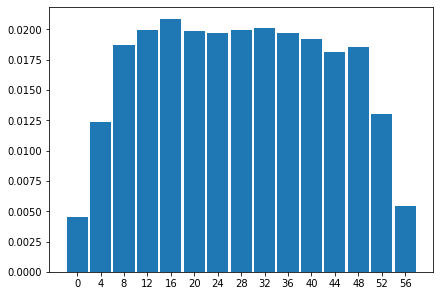

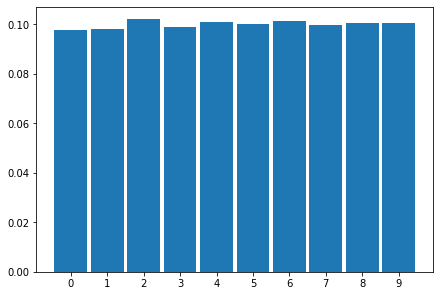

In [31]:
az.plot_dist(trace['output'][:,0])
plt.show()
az.plot_dist(trace['output'][:,0] - trace['locations'][:,0]);